In [2]:
import sys
sys.path.append('../')

## Subnetwork FLOPs

| Subnet      | FLOPs | Params     |
| :---        |    :----:   |          ---: |
| largest      | 3405398016.0       | 73755048.0   |
| Middle2   |    1645363200.0     |  36428808.0     |
| Middle1   |    961167360.0     |  26688568.0     |
| Smallest   |   460996608.0    |    12425256.0   |



| Subnet      | GFLOPs 
| :---        |    :----:   | 
| largest      | 3.41       | 
| Middle2   |    1.65     | 
| Middle1   |    0.96     |  
| Smallest   |   0.46    |   

In [38]:
import matplotlib
matplotlib.rcParams['font.family'] = "Times New Roman"
matplotlib.rcParams['font.size'] = 14

In [39]:
from weight_shared_analyzer import WeightSharedRun, plot_pareto_curves_ws, get_pareto_curves_df
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

In [4]:
smallest_subnet = {"d":[0,0,0,0], "e": 0.1}
middle_1_subnet = {"d":[0,1,0,1], "e": 0.14}
middle_2_subnet = {"d":[1,1,1,1], "e": 0.18}
largest_subnet = {"d":[2,2,2,2], "e": 0.25}
pareto_front_repr = [smallest_subnet, middle_1_subnet, middle_2_subnet, largest_subnet]
pareto_mapping = {f"{smallest_subnet}": 0.46,  f"{middle_1_subnet}": 0.96, f"{middle_2_subnet}": 1.65, f"{largest_subnet}" : 3.41}
subnet_ordering = [0.46, 0.96, 1.65, 3.41]

In [5]:
fedavg_smallest = WeightSharedRun(["flofa/cifar10-cleaned/1dl2fxi9", "flofa/cifar10-cleaned/1wh978r3", "flofa/cifar10-cleaned/nt133vae"], pareto_front_repr, pareto_mapping)
fedavg_middle_1 = WeightSharedRun(["flofa/cifar10-cleaned/w2sqaon2", "flofa/cifar10-cleaned/1zpyz46a", "flofa/cifar10-cleaned/sep9wu4x"], pareto_front_repr, pareto_mapping)
fedavg_middle_2 = WeightSharedRun(["flofa/cifar10-cleaned/3hh2dhn3", "flofa/cifar10-cleaned/1ayzkmjw", "flofa/cifar10-cleaned/3kwfm379"], pareto_front_repr, pareto_mapping)
fedavg_largest = WeightSharedRun(["flofa/cifar10-cleaned/1956egfp", "flofa/cifar10-cleaned/3bafwyp3", "flofa/cifar10-cleaned/ftc7rokb"], pareto_front_repr, pareto_mapping)

print(fedavg_smallest.name)
print(fedavg_smallest.df["round"].max())

print(fedavg_middle_1.name)
print(fedavg_middle_1.df["round"].max())

print(fedavg_middle_2.name)
print(fedavg_middle_2.df["round"].max())

print(fedavg_largest.name)
print(fedavg_largest.df["round"].max())

alph=100-fedavg-smallest-subnet
1650.0
alph=100-fedavg-small-subnet
1750.0
alph=100-fedavg-middle-subnet
1499.3333333333333
alph=100-fedavg-largest-subnet
1499.0


In [24]:
maxnet = WeightSharedRun(["flofa/cifar10-cleaned/3vn2tjv1", "flofa/cifar10-cleaned/1y1tkuw3", "flofa/cifar10-cleaned/1pqzuk1l"], pareto_front_repr, pareto_mapping, name="SuperFed")
print(maxnet.name)
print(maxnet.df["round"].max())

SuperFed
1650.0


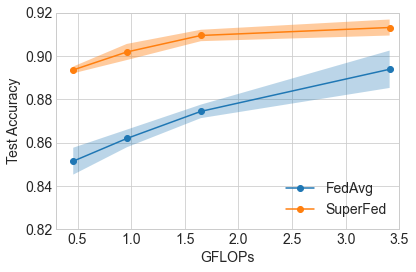

In [61]:
matplotlib.style.use("seaborn-whitegrid")
fedavg_runs = [fedavg_smallest, fedavg_middle_1, fedavg_middle_2,  fedavg_largest]
ws_runs = [maxnet]
# ws_runs = [TS]


mode="avg"
rounds = [1500]
for rnum in rounds:
    fed_pareto, error_fed_pareto = get_pareto_curves_df(fedavg_runs, "Test/{model}/Acc", uptil_round=rnum, rename=True, axis=0, name="FedAvg")
    ws_pareto, error_ws_pareto = get_pareto_curves_df(ws_runs,  "Test/{model}/Acc", uptil_round=rnum, rename=True, mode=mode)
    final_df = pd.concat([fed_pareto, ws_pareto], axis=1).loc[subnet_ordering]
    final_error_df = pd.concat([error_fed_pareto, error_ws_pareto], axis=1).loc[subnet_ordering]
#     ax = final_df.plot.line(yerr=final_error_df, marker='o')
    ax = final_df.plot.line(marker='o')
#     print(final_df.index)
#     print(final_df["SuperFed"] - final_error_df["SuperFed"])
    ax.fill_between(final_df.index, final_df["FedAvg"] - final_error_df["FedAvg"], final_df["FedAvg"] + final_error_df["FedAvg"], alpha=0.3)
    ax.fill_between(final_df.index, final_df["SuperFed"] - final_error_df["SuperFed"], final_df["SuperFed"] + final_error_df["SuperFed"], alpha=0.4)
    plt.xlabel("GFLOPs")
    plt.xlim(0.3,3.5) # have uniform x-axis accross all plots
    plt.ylim(0.82,0.92) # have uniform y-axis accross all plots
    plt.ylabel("Test Accuracy")
    plt.tight_layout()
    plt.legend(loc=4)
    plt.savefig("cifar10_alph100.pdf")